<a href="https://colab.research.google.com/github/Lucas01iveira/Projeto-SuperNovas-IA/blob/master/AtividadeSNIa_Parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Atividade parte 1

- Criação da função que recebe os parâmetros cosmológicos $z$ (redshift), $\Omega_M$ (omega da matéria), $\Omega_{EE}$ (omega da energia escura) e $\omega$ (parâmetro equação de estado); e retorna a distância de luminosidade em $Mpc$ e o módulo de distância $\mu = m-M$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 1) Função para o cálculo de dL (distância luminosidade)

In [ ]:
# Parâmetros de entrada
  # - H0: Constante de Hubble (km * s^-1 * Mpc^-1)
  # - Omega_m0: parâmetro de densidade da matéria no instante atual (adimensional)
  # - Omega_EE0: parâmetro de densidade da energia escura no instante atual (adimensional)
  # - w: parâmetro da equação de estado associado à energia escura (adimensional)
  # - z: redshift da luz observada

# Valores de saída
  # Distância de luminosidade em Mpc
  # Estimativa do erro no cálculo de dL (associado aos procedimentos numéricos)

def dL(H0, Omega_m0, Omega_EE0, w, z):
  import numpy as np
  from scipy.integrate import quad as Int

# ______________________________________________________________________________
  # 1) Constantes fundamentais
  c = 3*(10**8) # velocidade da luz
  H0_s = H0/(3.086*(10**19)) # constante de Hubble convertida para s^(-1)
  DH = (c/H0_s)*(3.24*(10**(-23))) # distância de Hubble convertida para Mpc

# ______________________________________________________________________________
  # 2) Definição da função 1/E(z)
  # (Os parâmetros de entrada já foram descritos anteriormente)
  def inv_E(z, Omega_m0, Omega_EE0, w):
    Omega_k0 = 1 - (Omega_m0 + Omega_EE0)
    return 1/(np.sqrt( Omega_m0*(1+z)**3 + Omega_EE0*(1+z)**(3*(1+w)) + Omega_k0*(1+z)**2 ))

# ______________________________________________________________________________
  # 3) Definição do script de integração da função 1/E via método de "quadratura Gaussiana"
  # (usando a função do scipy) entre os limites de integração 0 a z

  # Parâmetros de entrada
    # - Parâmetros cosmológicos (já descritos)
    # - z (redhisft): limite superior da integração

  # Valores de saída
    # - A estimativa numérica da integral 
    # - A estimativa do erro associado ao cálculo numérico dessa integral

  def integra_inv_E(Omega_m0, Omega_EE0, w, z):
      resultado_aproximado, erro_aproximado = Int(inv_E, 0, z, args=(Omega_m0, Omega_EE0, w))
      return resultado_aproximado, erro_aproximado

# ______________________________________________________________________________
  # 4) Definição da função que calcula a distância comóvel DC

  # Parâmetros de entrada
    # - Parâmetros cosmológicos (já descritos)
    # - z(redshift)

  # Valores de saída:
    # - A estimativa da distância comóvel DC em Mpc
    # - A estimativa do erro associado ao cálculo dessa distância comóvel em Mpc
  
  def DC(Omega_m0, Omega_EE0, w, z):
    valor_integral, erro_valor_integral = integra_inv_E(Omega_m0, Omega_EE0, w, z)

    dist_comov = DH*valor_integral
    erro_dist_comov = DH*erro_valor_integral

    return dist_comov, erro_dist_comov

# ______________________________________________________________________________
  # 5) Definição da função que calcula a distância de movimento próprio DM

  # Parâmetros de entrada
    # - Parâmetros cosmológicos (já descritos)
    # z (redshift)

  # Valores de saída
    # DM (em Mpc) de acordo com as condições em Omega_k0 (parâmetro de curvatura)
  
  def DM(Omega_m0, Omega_EE0, w, z):
    Omega_k0 = 1 - (Omega_m0 + Omega_EE0)
    dist_comov, erro_dist_comov = DC(Omega_m0, Omega_EE0, w, z)

    if Omega_k0 > 0:
      dist_mov_prop = DH*( 1/np.sqrt(Omega_k0) )*np.sinh( np.sqrt(Omega_k0)*(dist_comov/DH) ) 
      erro_dist_mov_prop = DH*( 1/(np.sqrt(Omega_k0)) )*np.cosh( np.sqrt(Omega_k0)*(dist_comov/DH) )*( np.sqrt(Omega_k0)/DH )*erro_dist_comov 

      return dist_mov_prop, erro_dist_mov_prop

    elif Omega_k0 == 0:
      return dist_comov, erro_dist_comov

    elif Omega_k0 < 0:
        dist_mov_prop = DH*( 1/np.sqrt(np.abs(Omega_k0)) )*np.sin( np.sqrt(np.abs(Omega_k0))*(dist_comov/DH) ) 
        erro_dist_mov_prop = DH*( 1/np.sqrt(np.abs(Omega_k0)) )*np.cos( np.sqrt(np.abs(Omega_k0))*(dist_comov/DH) )*\
                                 ( np.sqrt(np.abs(Omega_k0))/DH )*erro_dist_comov                   
        return dist_mov_prop, erro_dist_mov_prop

# ______________________________________________________________________________
  # 6) Retorno o valor da distância de luminosidade dL, em Mpc, e seu respectivo erro (aleatório),
  # também em Mpc, associado aos métodos de cálculo numérico empregados.

  DM, erro_DM = DM(Omega_m0, Omega_EE0, w, z)

  dist_luminosidade = DM*(1+z)
  erro_dist_luminosidade = erro_DM*(1+z)

  return dist_luminosidade, erro_dist_luminosidade

### 2) Testes da função dL

- Comparação com resultados de referência da biblioteca astropy.cosmology

In [ ]:
# Comparo alguns resultados com a biblioteca astropy.cosmology
import astropy.cosmology as c

# Defino o tipo de universo com o qual estou trabalhando
# A função "FlatLambdaCDM" está associada a um universo descrito pela métrica
# de FLRW, com curvatura 0 e com a presença de energia escura do tipo
# const cosmológica (w=-1). Os parâmetros obrigatórios para a definição
# de um universo com essas características pela função em questão são:

# H0 (km s^-1 Mpc^-1)
# Om0 (omega da matéria atualmente)

# Lembrando que, se o universo é plano, então Om0 + Olambda0 = 1 
# Portanto Olambda0 = 1 - Om0

cosmo = c.FlatLambdaCDM(H0 = 70, Om0 = 0.5)
# Olambda0 = 1 - 0.5 = 0.5

# Uma vez definido o universo de trabalho, verifico a distância de algum objeto
# com um certo redshift z. Tome z = 2, por exemplo
dL_referencia = cosmo.luminosity_distance(z=2)

print('Valor de referência: {:.0f}'.format(dL_referencia))

# Comparo com o valor fornecido pelo meu código nesse mesmo tipo de universo
dL_numerico, erro_dL_numerico = dL( H0=70, Omega_m0=0.5, Omega_EE0=0.5, w=-1, z=2)
print('Valor estimado: {:.0f} \u00B1 {:.0f} Mpc'.format(dL_numerico, erro_dL_numerico))


Valor de referência: 13502 Mpc
Valor estimado: 13509 ± 0 Mpc


In [ ]:
# outro teste
cosmo = c.FlatLambdaCDM(H0 = 70, Om0 = 0.234)
Olambda0 = 1-0.234 # De novo: podemos assumir isso pq estamos comparando com o caso 
                  # de universo de curvatura nula.

dL_referencia = cosmo.luminosity_distance(z=3.578)
dL_numerico, erro_dL_numerico = dL( H0 = 70, Omega_m0= 0.234, Omega_EE0= Olambda0, w=-1, z=3.578)

print('Valor de referência: {:.0f}'.format(dL_referencia))
print('Valor estimado: {:.0f} \u00B1 {:.0f} Mpc'.format(dL_numerico, erro_dL_numerico))

Valor de referência: 33843 Mpc
Valor estimado: 33862 ± 0 Mpc


In [ ]:
# verificação do tempo necessário para rodar o código

from time import time
start=time()
dL_numerico, erro_dL_numerico = dL( H0=70, Omega_m0=0.234, Omega_EE0=Olambda0, w=-1, z=3.578)
print(dL_numerico)
print(erro_dL_numerico)
print('Tempo necessário para rodar o código: {:.5f} s'.format(time()-start))

33861.93123980986
8.678879571325442e-06
Tempo necessário para rodar o código: 0.00101 s


- Comparação com resultados analíticos

  1) **Modelo de universo plano** ($\Omega_{k,0} = 0$) **dominado por matéria** ($\Omega_{m,0}=1$ e $\Omega_{EE,0} = 0$). A integral da distância comóvel pode ser calculada analiticamente, e portanto, a distância de luminosidade é dada por: $$D_L = 2 \cdot D_H \cdot (1+z) \cdot \left[ 1-\frac{1}{\sqrt{1+z}}\right]$$

  2) **Modelo de universo plano** ($\Omega_{k,0} = 0$) **dominado por energia escura do tipo constante cosmológica** ($\Omega_{m,0}=0$ e $\Omega_{EE,0} = 1$, $w = -1$). A integral da distância comóvel pode ser calculada analiticamente, e portanto, a distância de luminosidade é dada por: $$D_L = D_H \cdot (1+z) \cdot z$$

  3) **Modelo de universo vazio** ($\Omega_{m,0} = 0$ e $\Omega_{EE,0} = 0$) e, portanto, com curvatura positiva / geometria fechada ($\Omega_{k,0} = 1 - \Omega_{m,0} - \Omega_{EE,0} = 1$). A integral da distância comóvel pode ser calculada analiticamente e, portanto, a distância de luminosidade é dada por: $$D_L = D_H \cdot (1+z) \cdot \sinh (\log(1+z))$$

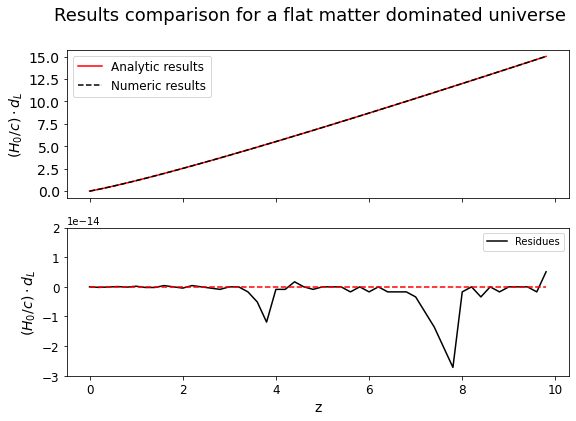

Tempo total de simulação: 0.72338 s 


In [ ]:
from time import time
start = time()
# Comparação dos cálculos analíticos com os cálculos numéricos para o caso 1

H0 = 70 # km s^-1 Mpc^-1
H0_s = H0/(3.086*(10**19)) # s^-1
Omega_m0 = 1 # adimensional
Omega_EE0 = 0 # adimensional
w = 0 # adimensional 
c = 3*10**8 # m s^-1
DH = (c/H0_s)*(3.24*(10**(-23))) # Mpc

def dL_analitico(z):
  import numpy as np
  return 2 * DH * (1+z) * ( 1 - 1/(np.sqrt(1+z)) )

z_plot = np.arange(0,10,0.2)
dL_analitico_plot = dL_analitico(z_plot)

dL_numerico_plot = []
for i in range(len(z_plot)):
  dL_numerico, erro_dL_numerico = dL(H0, Omega_m0, Omega_EE0, w, z_plot[i])
  dL_numerico_plot.append(dL_numerico)
dL_numerico_plot = np.array(dL_numerico_plot)

plt.figure(1, figsize=(9,6))
plt.suptitle('Results comparison for a flat matter dominated universe', fontsize=18)

# Apresentação das curvas de distância
plt.subplot(211)
plt.plot(z_plot, dL_analitico_plot/DH, label='Analytic results', color='red')
plt.plot(z_plot, dL_numerico_plot/DH, label='Numeric results', color='black', linestyle='dashed')
plt.ylabel('$(H_0/c) \cdot d_L$', fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('z', fontsize=14)
#plt.xticks(fontsize=12)
plt.tick_params(labelbottom = False)
plt.legend(fontsize=12)

# Gráfico de resíduos
plt.subplot(212)
plt.plot(z_plot, (dL_analitico_plot-dL_numerico_plot)/DH, color='black', label='Residues')
plt.plot(z_plot, [0]*len(z_plot), color='red', linestyle='dashed')
#plt.plot(z_plot, (dL_analitico_plot-dL_numerico_plot)/DH, color='black', linestyle='dashed', label='Residues')
#plt.plot(z_plot, [0]*len(z_plot), color='red', linestyle='solid')
plt.ylabel('$(H_0/c) \cdot d_L$', fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('z', fontsize=14)
plt.xticks(fontsize=12)
plt.legend(loc=0, fontsize=12)
plt.ylim(-3e-14, 2e-14)

plt.legend()
plt.show()
print('Tempo total de simulação: {:.5f} s '.format(time()-start))

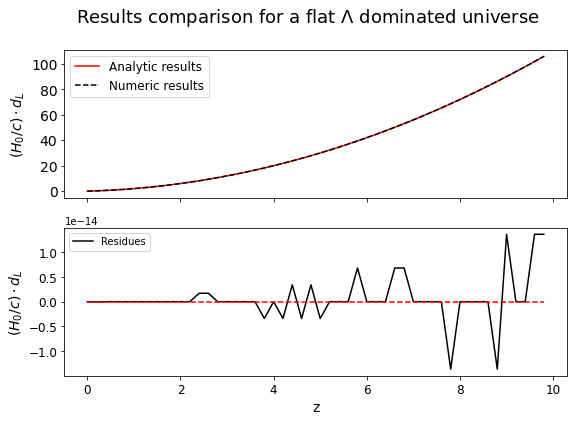

Tempo total de simulação: 0.46931 s 


In [ ]:
from time import time
start = time()
# Comparação dos cálculos analíticos com os cálculos numéricos para o caso 2

H0 = 70 # km s^-1 Mpc^-1
H0_s = H0/(3.086*(10**19)) # s^-1
Omega_m0 = 0 # adimensional
Omega_EE0 = 1 # adimensional
w = -1 # adimensional 
c = 3*10**8 # m s^-1
DH = (c/H0_s)*(3.24*(10**(-23))) # Mpc

def dL_analitico(z):
  import numpy as np
  return DH*(1+z)*z

z_plot = np.arange(0,10,0.2)
dL_analitico_plot = dL_analitico(z_plot)

dL_numerico_plot = []
for i in range(len(z_plot)):
  dL_numerico, erro_dL_numerico = dL(H0, Omega_m0, Omega_EE0, w, z_plot[i])
  dL_numerico_plot.append(dL_numerico)
dL_numerico_plot = np.array(dL_numerico_plot)

plt.figure(1, figsize=(9,6))
plt.suptitle('Results comparison for a flat $\Lambda$ dominated universe', fontsize=18)

# Apresentação das curvas de distância
plt.subplot(211)
plt.plot(z_plot, dL_analitico_plot/DH, label='Analytic results', color='red')
plt.plot(z_plot, dL_numerico_plot/DH, label='Numeric results', color='black', linestyle='dashed')
plt.ylabel('$(H_0/c) \cdot d_L$', fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('z', fontsize=14)
#plt.xticks(fontsize=12)
plt.tick_params(labelbottom = False)
plt.legend(fontsize=12)

# Gráfico de resíduos
plt.subplot(212)
plt.plot(z_plot, (dL_analitico_plot-dL_numerico_plot)/DH, color='black', label='Residues')
plt.plot(z_plot, [0]*len(z_plot), color='red', linestyle='dashed')
plt.ylabel('$(H_0/c) \cdot d_L$', fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('z', fontsize=14)
plt.xticks(fontsize=12)
plt.legend(loc=1, fontsize=12)

plt.legend()
plt.show()
print('Tempo total de simulação: {:.5f} s '.format(time()-start))

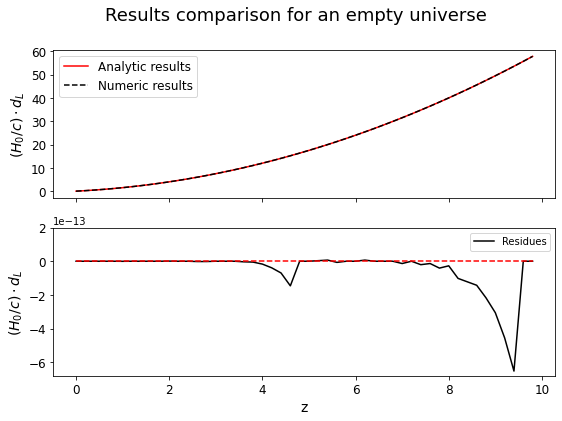

Tempo total de simulação: 0.42008 s 


In [ ]:
from time import time
start = time()
# Comparação dos cálculos analíticos com os cálculos numéricos para o caso 3
# (universo vazio, logo com curvatura positiva; i.e., geometria fechada)

#H0, Omega_m0, Omega_EE0, w, z
H0 = 70 # km s^-1 Mpc^-1
H0_s = H0/(3.086*(10**19)) # s^-1
Omega_m0 = 0 # adimensional
Omega_EE0 = 0 # adimensional
w = -1 # adimensional 
c = 3*10**8 # m s^-1
DH = (c/H0_s)*(3.24*(10**(-23))) # Mpc

def dL_analitico(z):
  import numpy as np
  return DH*np.sinh(np.log(1+z))*(1+z) # ALTERAR A SAÍDA AQUI

z_plot = np.arange(0,10,0.2)
dL_analitico_plot = dL_analitico(z_plot)

dL_numerico_plot = []
for i in range(len(z_plot)):
  dL_numerico, erro_dL_numerico = dL(H0, Omega_m0, Omega_EE0, w, z_plot[i])
  dL_numerico_plot.append(dL_numerico)
dL_numerico_plot = np.array(dL_numerico_plot)

plt.figure(1, figsize=(9,6))
plt.suptitle('Results comparison for an empty universe', fontsize=18)

# Apresentação das curvas de distância
plt.subplot(211)
plt.plot(z_plot, dL_analitico_plot/DH, label='Analytic results', color='red')
plt.plot(z_plot, dL_numerico_plot/DH, label='Numeric results', color='black', linestyle='dashed')
plt.ylabel('$(H_0/c) \cdot d_L$', fontsize=14)
plt.yticks(fontsize=12)
#plt.xlabel('z', fontsize=14)
#plt.xticks(fontsize=12)
plt.tick_params(labelbottom = False)
plt.legend(fontsize=12)

# Gráfico de resíduos
plt.subplot(212)
plt.plot(z_plot, (dL_analitico_plot-dL_numerico_plot)/DH, color='black', label='Residues')
plt.plot(z_plot, [0]*len(z_plot), color='red', linestyle='dashed')
plt.ylabel('$(H_0/c) \cdot d_L$', fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('z', fontsize=14)
plt.xticks(fontsize=12)
plt.legend(loc=1, fontsize=12)
plt.ylim(-6.8e-13,2e-13)

plt.legend()
plt.show()
print('Tempo total de simulação: {:.5f} s '.format(time()-start))

### 3) Função para o cálculo do módulo de distância ($\mu$)

In [ ]:
# Parâmetros de entrada (são os mesmos da função dL)
  # - H0: Constante de Hubble (km s^-1 Mpc^-1)
  # - Omega_m0: parâmetro de densidade da matéria no instante atual (adimensional)
  # - Omega_EE0: parâmetro de densidade da energia escura (adimensional)
  # - w: parâmetro da equação de estado associado à energia escura (adimensional)
  # - z: redshift de observação

# Valores de saída:
  # - Estimativa do módulo de distância
  # - Estimativa do erro associado ao módulo de distância calculado 
  # (o erro dos cálculos numéricos)

def mu(H0, Omega_m0, Omega_EE0, w, z):
  import numpy as np
  dist_luminosidade, erro_dist_luminosidade = dL(H0, Omega_m0, Omega_EE0, w, z)

  mod_dist = 5*np.log10(dist_luminosidade) + 25 # distância de luminosidade já fornecida em Mpc
  erro_mod_dist = 5*erro_dist_luminosidade/(dist_luminosidade*np.log(10)) # distância de luminosidade já fornecida em Mpc
  return mod_dist, erro_mod_dist

# Eu fiz alguns testes e, pelo menos no que se refere ao funcionamento da função,
# está tudo certo. Falta ter algum valor de referência p comparar e ver se os resultados
# estão fazendo sentido.

### 4) Plot da figura 6.2 do livro 
Gráfico das curvas $\frac{dL}{DH}\,$ x $\,z$ para diferentes modelos de universo:
- "Lambda only": $\Omega_{EE,0}=1$, $\Omega_{m,0}=0$, $w=-1$

- "Matter only": $\Omega_{EE,0}=0$, $\Omega_{m,0}=1$, $w=0$ 
(tanto faz o valor de $w$ nesse caso, já que não tem nenhuma matéria escura)

- "Benchmark model": $\Omega_{EE,0}=0.7$, $\Omega_{m,0}=0.3$, $w=-1$

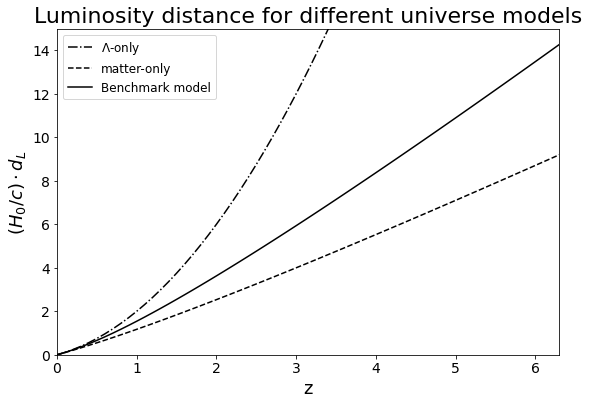

In [ ]:
# (Como nesse caso temos interesse apenas nas distâncias, usarei somente a função dL)

# Constantes fundamentais
H0 = 70 # km s^-1 Mpc^-1
c = 3*(10**8) # m s^-1
H0_s = H0/(3.086*(10**19)) # s^-1
DH = (c/H0_s)*(3.24*(10**(-23))) # Mpc

Omega_m0 = [0, 1, 0.3] # lambda / matter / benchmark
Omega_EE0 = [1, 0, 0.7] # lambda / matter / benchmark 
w = -1 # (nesse caso, estamos falando de energia escura do tipo const cosmológica)
z_plot = np.arange(0,7,0.1) # Vetor com os valores de z para o plot

ax = plt.figure(figsize=(9,6))
for i in range(3):
  dL_plot = []
  for j in range(len(z_plot)):
    dist_luminosidade, erro_dist_luminosidade = dL(H0, Omega_m0[i], Omega_EE0[i], w, z_plot[j])
    dL_plot.append(dist_luminosidade)
  dL_plot = np.array(dL_plot)

  if i == 0:
    #plot_label = '$\Lambda$-only'
    ax = plt.plot(z_plot, dL_plot/DH, label='$\Lambda$-only', color='black', linestyle='dashdot')

  elif i == 1:
    #plot_label = 'matter-only'
    ax = plt.plot(z_plot, dL_plot/DH, label='matter-only', color='black', linestyle='dashed')

  elif i == 2:
    #plot_label= 'Benchmark model'
    ax = plt.plot(z_plot, dL_plot/DH, label='Benchmark model',color='black')

plt.title('Luminosity distance for different universe models', fontsize=22)
plt.ylabel('$(H_0/c) \cdot d_L$', fontsize=18)
plt.xlabel('z', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,15)
plt.xlim(0,6.3)

plt.legend(fontsize=12)
plt.show()


- Teste da precisão da equação 6.31: 

$$ d_L = D_H \cdot z \cdot \left(1+\frac{1-q_0}{2}\cdot z\right)$$

sendo $q_0 = \Omega_{r,0} + \frac{1}{2}\Omega_{m,0} - \Omega_{EE,0}$

(no nosso caso estamos desconsiderando a contribuição da rediação, ou seja, $\Omega_{r,0} = 0$) 

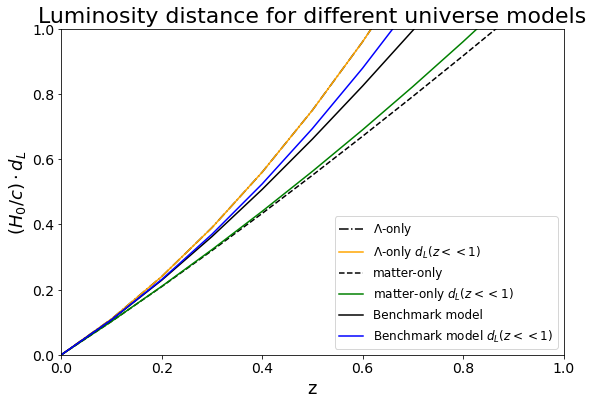

In [ ]:
# Acrescento, em vermelho, um plot da curva em questão

# (Como nesse caso temos interesse apenas nas distâncias, usarei somente a função dL)

# Constantes fundamentais
H0 = 70 # km s^-1 Mpc^-1
c = 3*(10**8) # m s^-1
H0_s = H0/(3.086*(10**19)) # s^-1
DH = (c/H0_s)*(3.24*(10**(-23))) # Mpc

Omega_m0 = [0, 1, 0.3] # lambda / matter / benchmark
Omega_EE0 = [1, 0, 0.7] # lambda / matter / benchmark 
w = -1 # (nesse caso, estamos falando de energia escura do tipo const cosmológica)
z_plot = np.arange(0,7,0.1) # Vetor com os valores de z para o plot

labels1 = ['$\Lambda$-only', 'matter-only', 'Benchmark model']
labels2 = ['$\Lambda$-only $d_L(z<<1)$', 'matter-only $d_L(z<<1)$', 'Benchmark model $d_L(z<<1)$']

linestyles1 = ['dashdot', 'dashed', 'solid']
colors2 = ['orange', 'green', 'blue']

# Defino a função de dL para redshifts pequenos
def dL_pequenos_z(H0, q0, z):
  c = 3*(10**8) # m s^-1
  H0_s = H0/(3.086*(10**19)) # s^-1
  DH = (c/H0_s)*(3.24*(10**(-23))) # Mpc

  return DH*z*(1 + (1-q0)*(z/2))

ax = plt.figure(figsize=(9,6))
for i in range(3):
  dL_plot = []
  for j in range(len(z_plot)):
    dist_luminosidade, erro_dist_luminosidade = dL(H0, Omega_m0[i], Omega_EE0[i], w, z_plot[j])
    dL_plot.append(dist_luminosidade)
  dL_plot = np.array(dL_plot)

  #plot_label = '$\Lambda$-only'
  ax = plt.plot(z_plot, dL_plot/DH, label=labels1[i], color='black', linestyle=linestyles1[i])
    
  q0 = (1/2)*Omega_m0[i] - Omega_EE0[i]
  dL_pequenos_z_plot = dL_pequenos_z(H0, q0, z_plot)
  ax = plt.plot(z_plot, dL_pequenos_z_plot/DH, color=colors2[i], label=labels2[i])


plt.title('Luminosity distance for different universe models', fontsize=22)
plt.ylabel('$(H_0/c) \cdot d_L$', fontsize=18)
plt.xlabel('z', fontsize=18)


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0,15)
#plt.xlim(0,6.3)
plt.ylim(0,1)
plt.xlim(0,1)

plt.legend(fontsize=12)
plt.show()


- Colocar no código o erro percentual para um dado valor de redshift (referência // estimativa de erro na utilização da expressão aproximada)

In [ ]:
dL??
dL_pequenos_z??

In [ ]:
# Erro percentual para valores no redshift z = 0.4

Omega_m0 = [1, 0, 0.3] # Matter-only / Lambda-only / Benchmark
Omega_EE0 = [0, 1, 0.7] # Matter-only / Lambda-only / Benchmark
legendas = ['MATTER-ONLY', 'LAMBDA-ONLY', 'BENCHMARK']
Omega_r0 = 0 # estamos desconsiderando as contribuição da radiação (já morreu há muito tempo)

H0 = 70 # km s^-1 Mpc^-1
for i in range(3):
  q0_i = (1/2)*Omega_m0[i] - Omega_EE0[i]
  dist_lum, erro_dist_lum = dL(H0, Omega_m0[i], Omega_EE0[i], -1, 0.8)
  erro_perc = np.abs( dist_lum - dL_pequenos_z(H0,q0_i,0.8) )/dist_lum
  print('Erro percentual do modelo {} no redshift z = 0.8: {:.5f} % '.format(legendas[i], erro_perc))

Erro percentual do modelo MATTER-ONLY no redshift z = 0.8: 0.04721 % 
Erro percentual do modelo LAMBDA-ONLY no redshift z = 0.8: 0.00000 % 
Erro percentual do modelo BENCHMARK no redshift z = 0.8: 0.10615 % 


### 5) Cálculo da magnitude aparente de um objeto com redshift z=1 e magnitude absoluta M = -19.05 nos seguintes modelos


1.   Einstein-De Sitter ($\Omega_{m,0} = 1$ e $\Omega_{EE,0} = 0$)
2.   Aberto ($\Omega_{m,0} = 0.3$ e $\Omega_{EE,0} = 0$)
3.   Benchmark ($\Omega_{m,0} = 0.3$, $\Omega_{EE,0} = 0.7$ e $w = -1$)
4.   (sem nome) ($\Omega_{m,0} = 0.3$, $\Omega_{EE,0} = 0.7$ e $w = -0.8$)
5.   (sem nome) ($\Omega_{m,0} = 0.3$, $\Omega_{EE,0} = 0.7$ e $w = -1.2$)


In [ ]:

modelos = ['Einstein - De Sitter', 'Aberto', 'Benchmark', '(sem nome)', '(sem nome)'] # Vetor com os nomes dos modelos
Omega_m0 = [1, 0.3, 0.3, 0.3, 0.3] # Vetor com os valores de Omega da matéria
Omega_EE0 = [0, 0, 0.7, 0.7, 0.7] # Vetor com os valores de Omega da energia escura
w = [0, 0, -1, -0.8, -1.2] # Vetor com os parâmetros da eq. de estado da energia escura
H0 = 70 # km s^-1 Mpc^-1 (const de Hubble)
M = -19.05 # Magnitude absoluta do objeto em estudo
z = 1 # Redshift do objeto em estudo


for i in range(5):
  mod_dist, erro_mod_dist = mu(H0, Omega_m0[i], Omega_EE0[i], w[i], z)

  mag_aparente = mod_dist + M
  erro_mag_aparente = erro_mod_dist
  # o erro é tão pequeno dado o método numérico utilizado que nem vale a pena mostrar 
  # (a precisão é muito alta)
  
  print('MODELO: {}'.format(modelos[i]), end=' / ')
  print('MAGNITUDE APARENTE: {:.5f}'.format(mag_aparente, erro_mag_aparente))

MODELO: Einstein - De Sitter / MAGNITUDE APARENTE: 24.45367
MODELO: Aberto / MAGNITUDE APARENTE: 24.79525
MODELO: Benchmark / MAGNITUDE APARENTE: 25.05145
MODELO: (sem nome) / MAGNITUDE APARENTE: 24.95884
MODELO: (sem nome) / MAGNITUDE APARENTE: 25.13078
